In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

In [3]:
data_A = pd.read_csv("/home/users/russelld/DSC291/Final_Project/datasets/DetectorA.csv")
data_B = pd.read_csv("/home/users/russelld/DSC291/Final_Project/datasets/DetectorB.csv")
data_C = pd.read_csv("/home/users/russelld/DSC291/Final_Project/datasets/DetectorC.csv")
data_Target = pd.read_csv("/home/users/russelld/DSC291/Final_Project/datasets/DetectorTarget.csv")


<Axes: title={'center': 'Detector A Energy Spectrum'}, xlabel='Energy [keV]', ylabel='Frequency'>

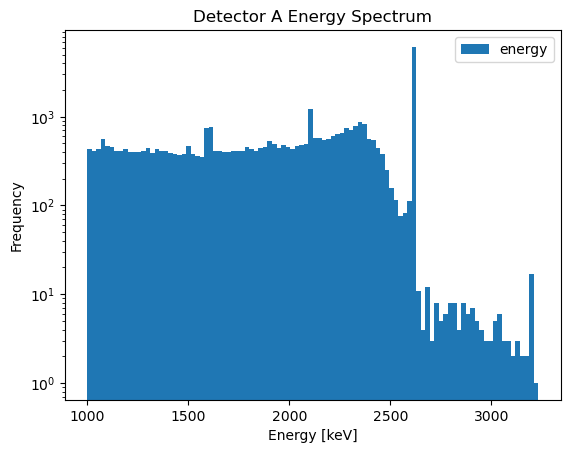

In [4]:
data_A.plot(kind='hist', title='Detector A Energy Spectrum', column='energy', bins=100, logy=True, xlabel="Energy [keV]")

<Axes: title={'center': 'Detector B Energy Spectrum'}, xlabel='Energy [keV]', ylabel='Frequency'>

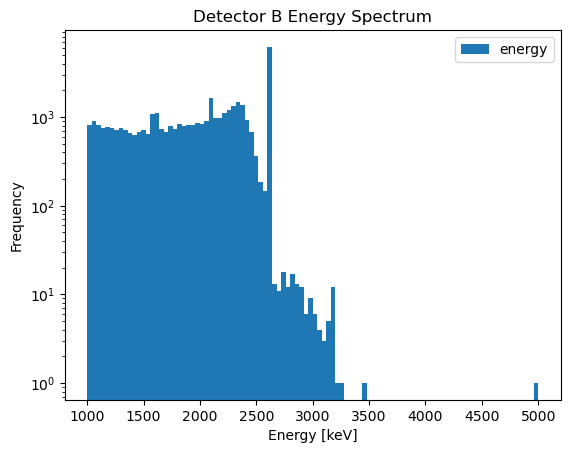

In [5]:
data_B.plot(kind='hist', title='Detector B Energy Spectrum', column='energy', bins=100, logy=True, xlabel="Energy [keV]")

<Axes: title={'center': 'Detector C Energy Spectrum'}, xlabel='Energy [keV]', ylabel='Frequency'>

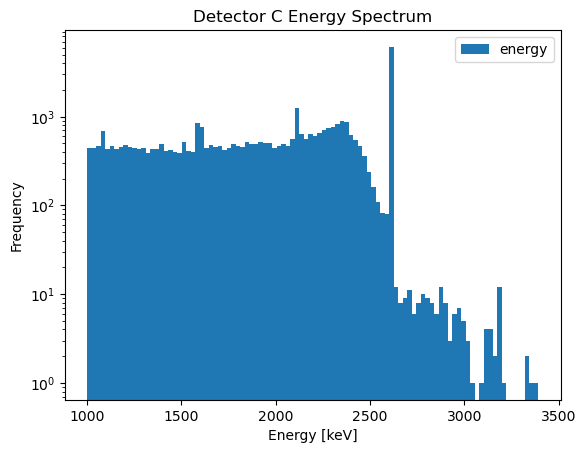

In [6]:
data_C.plot(kind='hist', title='Detector C Energy Spectrum', column='energy', bins=100, logy=True, xlabel="Energy [keV]")

<Axes: title={'center': 'Detector Target Energy Spectrum'}, xlabel='Energy [keV]', ylabel='Frequency'>

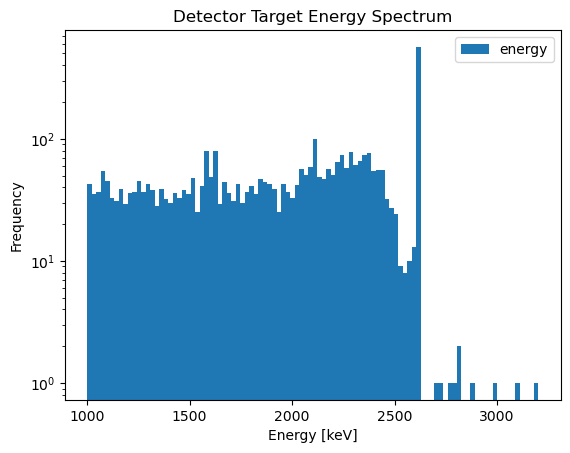

In [7]:
data_Target.plot(kind='hist', title='Detector Target Energy Spectrum', column='energy', bins=100, logy=True, xlabel="Energy [keV]")

step 2: signal peak cut

In [8]:
def calc_cut_eff(Nc, tau, N, B, Bc):
    eff = (Nc-tau*Bc)/(N-tau*B)
    return eff

In [267]:
signal_window_min= 1590
signal_window_max = 1595

sig_base_window_min = 1585
sig_base_window_max = 1590


energies_A = data_A["energy"]
sig_energy = data_A.loc[(data_A['energy'] >= signal_window_min) & (data_A['energy'] <= signal_window_max), 'energy']
base_energy = data_A.loc[(data_A['energy'] >= sig_base_window_min) & (data_A['energy'] <= sig_base_window_max), 'energy']
N_sig = len(sig_energy)
B_sig = len(base_energy)
tau_sig = 1
sig_scores = data_A.loc[(data_A['energy'] >= signal_window_min) & (data_A['energy'] <= signal_window_max), 'cnn_score']
baseline_scores = data_A.loc[(data_A['energy'] >= sig_base_window_min) & (data_A['energy'] <= sig_base_window_max), 'cnn_score'] 
cut_thresh = .15
Nc_sig= len(data_A.loc[(data_A['energy'] >= signal_window_min) & (data_A['energy'] <= signal_window_max) & (data_A['cnn_score']>cut_thresh), 'cnn_score'])
Bc_sig = len(data_A.loc[(data_A['energy'] >= sig_base_window_min) & (data_A['energy'] <= sig_base_window_max) & (data_A['cnn_score']>cut_thresh), 'cnn_score'])
cut_eff = calc_cut_eff(Nc_sig, tau_sig, N_sig, B_sig, Bc_sig)
print("True Positive Rate (Cut efficiency)= ", cut_eff)
print(N_sig, B_sig, Nc_sig, Bc_sig)




True Positive Rate (Cut efficiency)=  0.7690217391304348
454 86 329 46


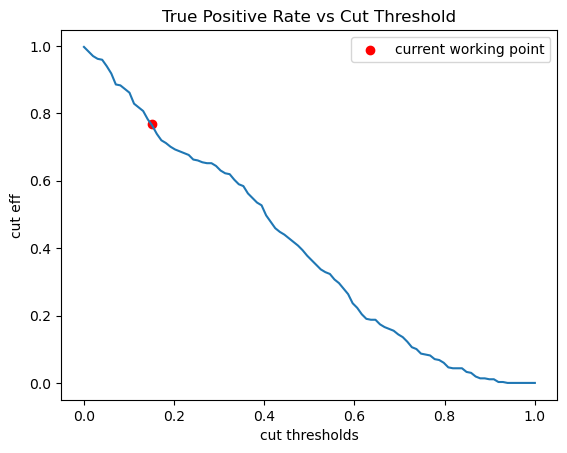

In [10]:

thresholds = np.linspace(0, 1, num=100)
effs = []
for thresh in thresholds:
    Nc= len(data_A.loc[(data_A['energy'] >= signal_window_min) & (data_A['energy'] <= signal_window_max) & (data_A['cnn_score']>thresh), 'cnn_score'])
    Bc = len(data_A.loc[(data_A['energy'] >= sig_base_window_min) & (data_A['energy'] <= sig_base_window_max) & (data_A['cnn_score']>thresh), 'cnn_score'])
    eff = calc_cut_eff(Nc, 1, N_sig, B_sig, Bc)
    effs.append(eff)
    
plt.figure()
plt.plot(thresholds, effs)
plt.scatter(.15,0.7690217391304348, label="current working point", color="red")
plt.legend()
plt.xlabel("cut thresholds")
plt.ylabel("cut eff")
plt.title("True Positive Rate vs Cut Threshold")
plt.show()

Step 3: false positive rate for background peak

In [268]:
bkg_window_min= 2098
bkg_window_max = 2108

bkg_base_window_min = 2093
bkg_base_window_max = 2113


energies_A = data_A["energy"]
bkg_energy = data_A.loc[(data_A['energy'] >= bkg_window_min) & (data_A['energy'] <= bkg_window_max), 'energy']
bkg_base_energy_lower = data_A.loc[(data_A['energy'] >= bkg_base_window_min) & (data_A['energy'] <= bkg_window_min), 'energy']
bkg_base_energy_upper = data_A.loc[(data_A['energy'] >= bkg_window_max) & (data_A['energy'] <= bkg_base_window_max), 'energy']

N_bkg = len(bkg_energy)
B_bkg = len(bkg_base_energy_lower) + len(bkg_base_energy_upper)
tau_bkg = 1
bkg_scores = data_A.loc[(data_A['energy'] >= bkg_window_min) & (data_A['energy'] <= bkg_window_max), 'cnn_score']
# bkg_baseline_scores = data_A.loc[((data_A['energy'] >= bkg_base_window_min) & (data_A['energy'] <= bkg_window_min)) or ((data_A['energy'] >= bkg_window_max) & (data_A['energy'] <= bkg_base_window_max)), 'cnn_score'] 
cut_thresh = .15
Nc_bkg= len(data_A.loc[(data_A['energy'] >= bkg_window_min) & (data_A['energy'] <= bkg_window_max) & (data_A['cnn_score']>cut_thresh), 'cnn_score'])
Bc_bkg = len(data_A.loc[(data_A['energy'] >= bkg_base_window_min) & (data_A['energy'] <= bkg_window_min) & (data_A['cnn_score']>cut_thresh), 'cnn_score']) + len(data_A.loc[(data_A['energy'] >= bkg_window_max) & (data_A['energy'] <= bkg_base_window_max) & (data_A['cnn_score']>cut_thresh), 'cnn_score'])
cut_eff_bkg = calc_cut_eff(Nc_bkg, tau_bkg, N_bkg, B_bkg, Bc_bkg)
print("False Positive Rate (Cut efficiency)= ", cut_eff_bkg)
print(N_bkg, B_bkg, Nc_bkg, Bc_bkg)

False Positive Rate (Cut efficiency)=  0.10058309037900874
933 247 165 96


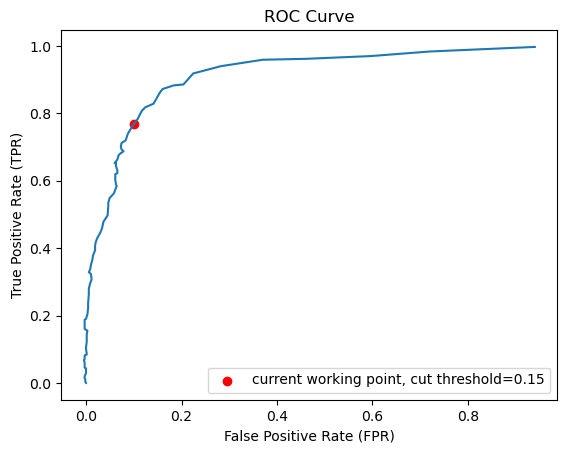

In [12]:
thresholds = np.linspace(0, 1, num=100)
tprs = []
fprs = []
for thresh in thresholds:
    Nc= len(data_A.loc[(data_A['energy'] >= signal_window_min) & (data_A['energy'] <= signal_window_max) & (data_A['cnn_score']>thresh), 'cnn_score'])
    Bc = len(data_A.loc[(data_A['energy'] >= sig_base_window_min) & (data_A['energy'] <= sig_base_window_max) & (data_A['cnn_score']>thresh), 'cnn_score'])
    tpr = calc_cut_eff(Nc, 1, N_sig, B_sig, Bc)
    tprs.append(tpr)

    nc_bkg = len(data_A.loc[(data_A['energy'] >= bkg_window_min) & (data_A['energy'] <= bkg_window_max) & (data_A['cnn_score']>thresh), 'cnn_score']) 
    bc_bkg = len(data_A.loc[(data_A['energy'] >= bkg_base_window_min) & (data_A['energy'] <= bkg_window_min) & (data_A['cnn_score']>thresh), 'cnn_score']) + len(data_A.loc[(data_A['energy'] >= bkg_window_max) & (data_A['energy'] <= bkg_base_window_max) & (data_A['cnn_score']>thresh), 'cnn_score'])
    fpr = calc_cut_eff(nc_bkg, 1, N_bkg, B_bkg, bc_bkg)
    fprs.append(fpr)

    
plt.figure()
plt.plot(fprs, tprs)
plt.scatter(0.10058309037900874, 0.7690217391304348, label="current working point, cut threshold=0.15", color="red")
plt.legend()
plt.title("ROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.show()

step 4: PDF for NLDBD

In [13]:
E0= 2039
sigma =1
def nldbd_pdf(x):
    return stats.norm.pdf(x, loc=E0, scale=sigma)

Step 5: apply the cut

In [269]:
data_A_with_cut = data_A.loc[(data_A['cnn_score']>cut_thresh)]
data_B_with_cut = data_B.loc[(data_B['cnn_score']>cut_thresh)]
data_C_with_cut = data_C.loc[(data_C['cnn_score']>cut_thresh)]
data_Target_with_cut = data_Target.loc[(data_B['cnn_score']>cut_thresh)]


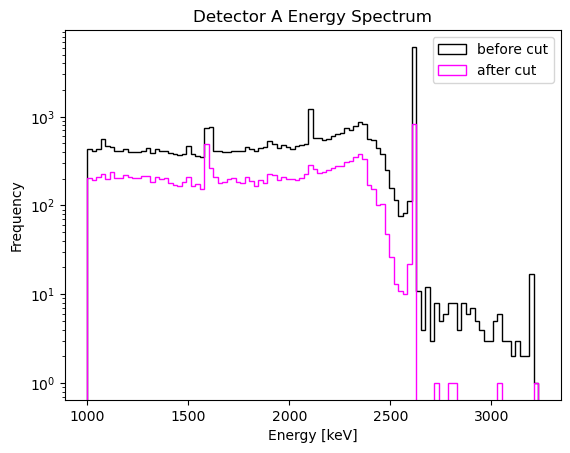

In [270]:
plt.figure()
ax = data_A['energy'].plot(
    kind='hist', 
    title='Detector A Energy Spectrum', 
    bins=100, 
    logy=True, 
    histtype='step',
    label='before cut',
    xlabel="Energy [keV]",
    color="black"
)

data_A_with_cut['energy'].plot(
    kind='hist', 
    ax=ax, 
    bins=100, 
    histtype='step',
    logy=True, 
    label='after cut',
    xlabel="Energy [keV]",
    color="magenta"
)

plt.legend()
plt.show()

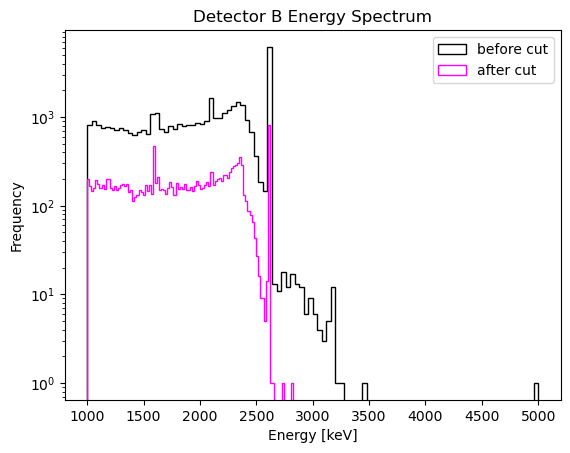

In [271]:
plt.figure()
ax = data_B['energy'].plot(
    kind='hist', 
    title='Detector B Energy Spectrum', 
    bins=100, 
    logy=True, 
    histtype='step',
    label='before cut',
    xlabel="Energy [keV]",
    color="black"
)

data_B_with_cut['energy'].plot(
    kind='hist', 
    ax=ax, 
    bins=100, 
    histtype='step',
    logy=True, 
    label='after cut',
    xlabel="Energy [keV]",
    color="magenta"
)

plt.legend()
plt.show()

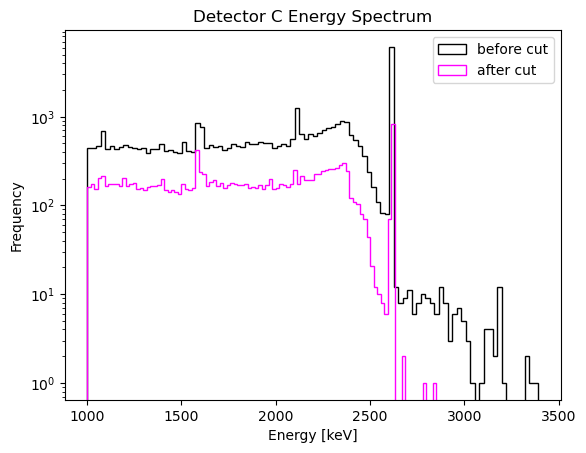

In [272]:
plt.figure()
ax = data_C['energy'].plot(
    kind='hist', 
    title='Detector C Energy Spectrum', 
    bins=100, 
    logy=True, 
    histtype='step',
    label='before cut',
    xlabel="Energy [keV]",
    color="black"
)

data_C_with_cut['energy'].plot(
    kind='hist', 
    ax=ax, 
    bins=100, 
    histtype='step',
    logy=True, 
    label='after cut',
    xlabel="Energy [keV]",
    color="magenta"
)

plt.legend()
plt.show()

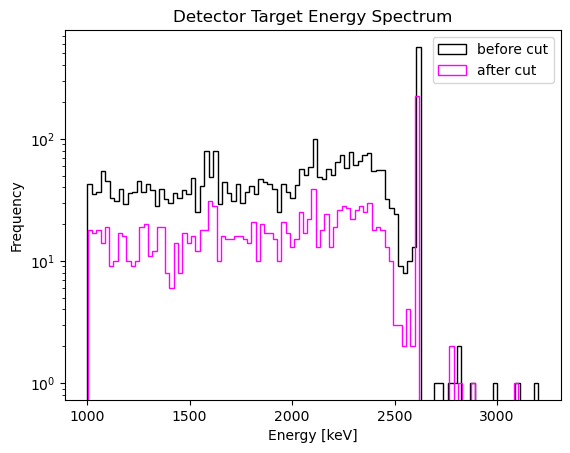

In [273]:
plt.figure()
ax = data_Target['energy'].plot(
    kind='hist', 
    title='Detector Target Energy Spectrum', 
    bins=100, 
    logy=True, 
    histtype='step',
    label='before cut',
    xlabel="Energy [keV]",
    color="black"
)

data_Target_with_cut['energy'].plot(
    kind='hist', 
    ax=ax, 
    bins=100, 
    histtype='step',
    logy=True, 
    label='after cut',
    xlabel="Energy [keV]",
    color="magenta"
)

plt.legend()
plt.show()

Step 5: PDF for detectors (are they all the same?)

Step 6: Perform the fit

In [44]:
pip install iminuit

Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/users/jchismar/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/pip/__main__.py", line 22, in <module>
    from pip._internal.cli.main import main as _main
  File "/home/users/jchismar/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/pip/_internal/cli/main.py", line 11, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/home/users/jchismar/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/home/users/jchismar/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/pip/_internal/cli/main_parser.py", line 9, in <module>
    from pip._internal.build_env import get_runnable_pip
  File "/home/users/jchismar/miniconda3/envs/pytorch_env/lib/python3.12/site-

In [23]:
from iminuit import Minuit

[1012.5 1037.5 1062.5 1087.5 1112.5 1137.5 1162.5 1187.5 1212.5 1237.5
 1262.5 1287.5 1312.5 1337.5 1362.5 1387.5 1412.5 1437.5 1462.5 1487.5
 1512.5 1537.5 1562.5 1587.5 1612.5 1637.5 1662.5 1687.5 1712.5 1737.5
 1762.5 1787.5 1812.5 1837.5 1862.5 1887.5 1912.5 1937.5 1962.5 1987.5
 2012.5 2037.5 2062.5 2087.5 2112.5 2137.5 2162.5 2187.5 2212.5 2237.5
 2262.5 2287.5 2312.5 2337.5 2362.5 2387.5 2412.5 2437.5 2462.5 2487.5
 2512.5 2537.5 2562.5 2587.5 2612.5 2637.5 2662.5 2687.5 2712.5 2737.5
 2762.5 2787.5 2812.5 2837.5 2862.5 2887.5 2912.5 2937.5 2962.5 2987.5
 3012.5 3037.5 3062.5 3087.5 3112.5 3137.5 3162.5 3187.5 3212.5 3237.5
 3262.5 3287.5 3312.5 3337.5 3362.5 3387.5 3412.5 3437.5 3462.5 3487.5]


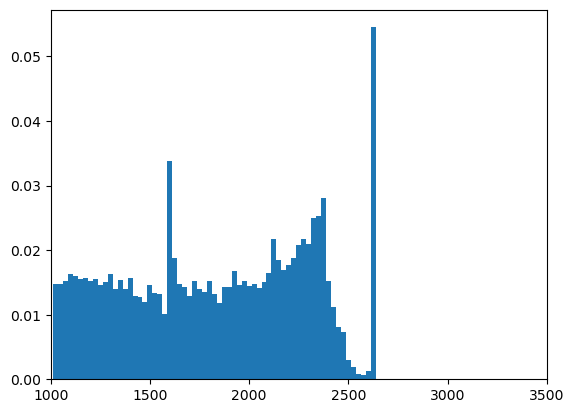

In [274]:
counts_A, bin_edges_A = np.histogram(data_A_with_cut['energy'], bins=100, range=(1000, 3500))
normalized_counts_A = counts_A/(np.sum(counts_A))

bin_width_A = (bin_edges_A[-1] - bin_edges_A[0]) / 100
bin_centers_A = 0.5 * (bin_edges_A[1:] + bin_edges_A[:-1])
print(bin_centers_A)
plt.bar(bin_edges_A[1:], normalized_counts_A, width=bin_width_A)
plt.xlim(1000, 3500)
plt.show()

[1012.5 1037.5 1062.5 1087.5 1112.5 1137.5 1162.5 1187.5 1212.5 1237.5
 1262.5 1287.5 1312.5 1337.5 1362.5 1387.5 1412.5 1437.5 1462.5 1487.5
 1512.5 1537.5 1562.5 1587.5 1612.5 1637.5 1662.5 1687.5 1712.5 1737.5
 1762.5 1787.5 1812.5 1837.5 1862.5 1887.5 1912.5 1937.5 1962.5 1987.5
 2012.5 2037.5 2062.5 2087.5 2112.5 2137.5 2162.5 2187.5 2212.5 2237.5
 2262.5 2287.5 2312.5 2337.5 2362.5 2387.5 2412.5 2437.5 2462.5 2487.5
 2512.5 2537.5 2562.5 2587.5 2612.5 2637.5 2662.5 2687.5 2712.5 2737.5
 2762.5 2787.5 2812.5 2837.5 2862.5 2887.5 2912.5 2937.5 2962.5 2987.5
 3012.5 3037.5 3062.5 3087.5 3112.5 3137.5 3162.5 3187.5 3212.5 3237.5
 3262.5 3287.5 3312.5 3337.5 3362.5 3387.5 3412.5 3437.5 3462.5 3487.5]


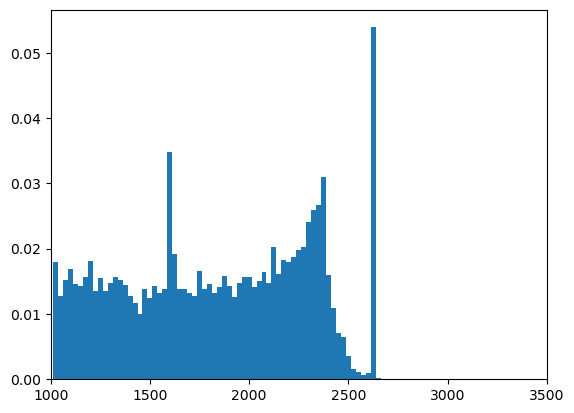

In [275]:
counts_B, bin_edges_B = np.histogram(data_B_with_cut['energy'], bins=100, range=(1000, 3500))
normalized_counts_B = counts_B/(np.sum(counts_B))
bin_width_B = (bin_edges_B[-1] - bin_edges_B[0]) / 100
bin_centers_B = 0.5 * (bin_edges_B[1:] + bin_edges_B[:-1])
plt.bar(bin_edges_B[1:], normalized_counts_B, width=bin_width_B)
print(bin_centers_B)
plt.xlim(1000, 3500)
plt.show()

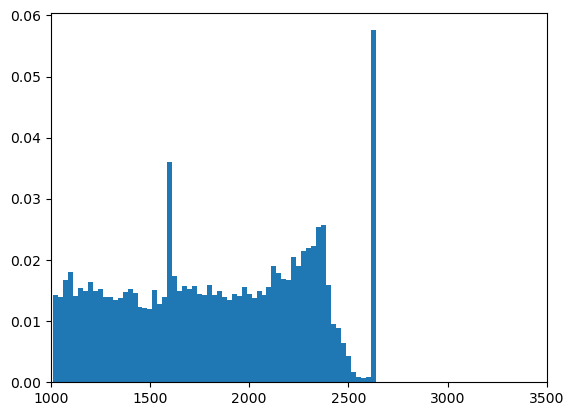

In [276]:
counts_C, bin_edges_C = np.histogram(data_C_with_cut['energy'], bins=100,range=(1000, 3500))
normalized_counts_C = counts_C/(np.sum(counts_C))
bin_width_C = (bin_edges_C[-1] - bin_edges_C[0]) / 100
bin_centers_C = 0.5 * (bin_edges_C[1:] + bin_edges_C[:-1])
plt.bar(bin_edges_C[1:], normalized_counts_C, width=bin_width_C)
plt.xlim(1000, 3500)
plt.show()

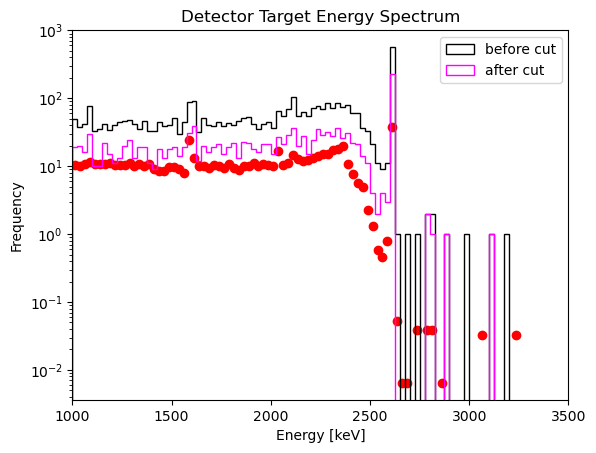

In [277]:
plt.figure()
ax = data_Target['energy'].plot(
    kind='hist', 
    title='Detector Target Energy Spectrum', 
    bins=100, 
    logy=True, 
    histtype='step',
    label='before cut',
    xlabel="Energy [keV]",
    color="black",
    range=(1000, 3500)
)

data_Target_with_cut['energy'].plot(
    kind='hist', 
    ax=ax, 
    bins=100, 
    histtype='step',
    logy=True, 
    label='after cut',
    xlabel="Energy [keV]",
    color="magenta",
    range=(1000, 3500)
)


# plt.bar(bin_centers, 1350*normalized_counts_A+770*normalized_counts_B+1000*normalized_counts_C+ 500*nldbd_pdf(bin_centers_C), width=bin_width_C)
plt.scatter(bin_centers_C,500*normalized_counts_A+100*normalized_counts_B+100*normalized_counts_C+ 50*nldbd_pdf(bin_centers_C), color='red' )
# plt.plot(bin_centers_C, new_fit(bin_centers, 100, 770, 0, 50), color='orange')
# plt.bar(bin_centers, counts, width=bin_width)
plt.xlim(1000, 3500)
plt.legend()
plt.show()

In [278]:
def new_fit(bin_centers, thetaA, thetaB, thetaC, thetaNLDBD):
    # thetaA = 1350
    # thetaB = 770
    return thetaA*normalized_counts_A + thetaB*normalized_counts_B + thetaC*normalized_counts_C + thetaNLDBD*nldbd_pdf(bin_centers)

In [279]:
counts, bin_edges = np.histogram(data_Target_with_cut['energy'], bins=100, range=(1000,3500)) 
bin_width = (bin_edges[-1] - bin_edges[0]) / 100
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

def chi2(thetaC, thetaA, thetaB, thetaNLDBD):
    expected = new_fit(bin_centers, thetaA, thetaB, thetaC, thetaNLDBD)
    uncert = np.abs(expected)
    actual = counts
    chi2_value = 0
    for j, ex in enumerate(expected):
        if ex !=0:
            chi2_value += ((actual[j]-ex)**2)/ex
        # else:
        #     chi2_value += actual[j]**2
    # chi2_value = np.sum(((actual - expected) ** 2) / (expected+  epsilon))
    return chi2_value + ((thetaA-1350)**2)/(100**2) + ((thetaB-770)**2)/(270**2)

minuit = Minuit(chi2, thetaA=1, thetaB=1, thetaC=100, thetaNLDBD=100)
minuit.limits = [(0, None)]*4
minuit.migrad()
best_fit_thetaA = minuit.values["thetaA"]
best_fit_thetaB = minuit.values["thetaB"]
best_fit_thetaC = minuit.values["thetaC"]
best_fit_thetaNLDBD = minuit.values["thetaNLDBD"]
print(f"Best-fit thetaC: {best_fit_thetaC:.2f}")
print(f"Best-fit thetaNLDBD: {best_fit_thetaNLDBD:.2f}")
print(f"Best-fit thetaA: {best_fit_thetaA:.2f}")
print(f"Best-fit thetaB: {best_fit_thetaB:.2f}")
chi2_min = minuit.fval

print (f"Best-fit chi-square: {chi2_min:.2f}")

Best-fit thetaC: 382.71
Best-fit thetaNLDBD: 23.35
Best-fit thetaA: 1295.15
Best-fit thetaB: 0.00
Best-fit chi-square: 412.08


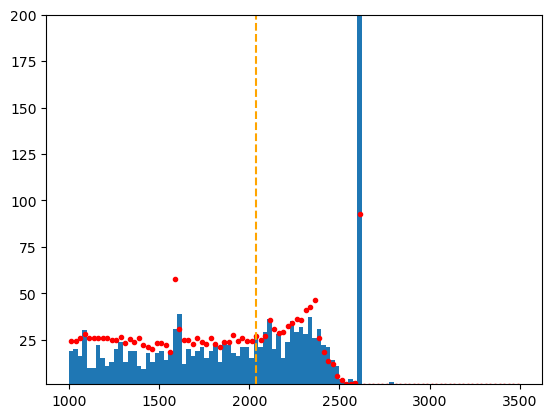

In [280]:

plt.axvline(x=2039, color="orange", linestyle="dashed")
# plt.plot(bin_centers, fit_function(bin_centers, best_fit_thetaC, best_fit_thetaNLDBD, best_fit_A1, best_fit_A2, best_fit_A3, best_fit_B1, best_fit_B2, best_fit_B3, best_fit_C1, best_fit_C2, best_fit_C3, best_fit_D1, best_fit_D2, best_fit_D3, best_fit_F1, best_fit_F2, best_fit_F3, best_fit_ss[0], best_fit_ss[1], best_fit_ss[2], best_fit_sb[0], best_fit_sb[1], best_fit_sb[2]), color='red')
# plt.plot(bin_centers, new_fit(bin_centers, 1350, 770, 1000, 50), color='red')
plt.bar(bin_centers, counts, width=bin_width)
plt.scatter(bin_centers, new_fit(bin_centers, best_fit_thetaA, best_fit_thetaB, best_fit_thetaC, best_fit_thetaNLDBD), color='red',marker='.')


# plt.yscale('log')
plt.ylim(1, 200)
plt.show()

In [281]:
m=best_fit_thetaNLDBD/cut_eff #number of NLDBD
print(m)

30.359375166127812


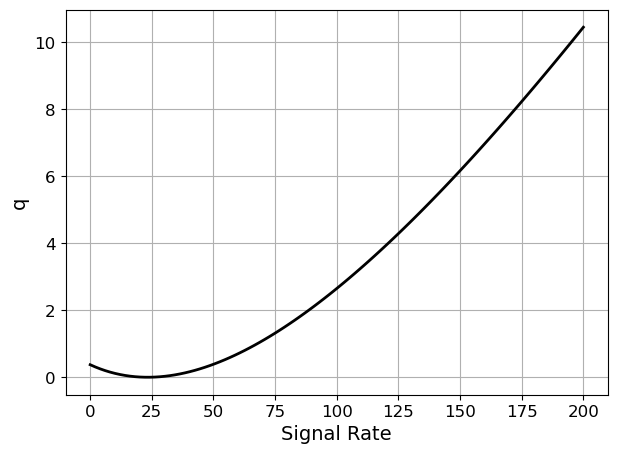

In [282]:
thetaNLDBD_scan = np.linspace(0, 200, 100)  # Test range of signal strengths
q_values = []

for theta in thetaNLDBD_scan:
    m_fixed = Minuit(lambda thetaA, thetaB, thetaC : chi2(thetaA, thetaB, thetaC, theta),thetaA=1, thetaB=1, thetaC=1)
    m_fixed.limits = [(0, None)] * 3
    m_fixed.migrad()
    if not m_fixed.valid:
        print(f"Warning: Fit failed for theta = {theta}")
    chi2_fixed = m_fixed.fval
    # print(chi2_fixed)
    
    # Calculate q for this signal rate
    q = chi2_fixed-chi2_min
    # print(chi2_fixed, chi2_min, theta)
    q_values.append(q)

# Plot q vs. signal rate
plt.figure(figsize=(7, 5))
plt.plot(thetaNLDBD_scan, q_values, color='black', linewidth=2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Signal Rate", fontsize=14)
plt.ylabel("q", fontsize=14)
plt.grid()
plt.show()

In [283]:
closest_diff = float('inf')
closest_rate = float('inf')
for i in range(len(thetaNLDBD_scan)):
    if abs(q_values[i]-2.71) < closest_diff and thetaNLDBD_scan[i]>best_fit_thetaNLDBD: # Note that the upperlimit has to be greater than S_best-fit
        closest_diff = abs(q_values[i]-2.71)
        closest_rate = thetaNLDBD_scan[i]

In [284]:
print (f"Upper-limit on Signal Rate: {closest_rate:.2f}")

Upper-limit on Signal Rate: 101.01


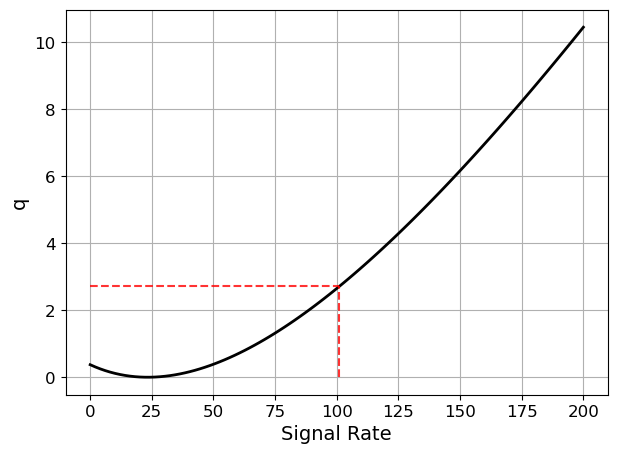

In [285]:
plt.figure(figsize=(7, 5))
plt.plot(thetaNLDBD_scan, q_values, color='black', linewidth=2)
plt.hlines(2.71, 0, closest_rate, linestyle='--', color='red', alpha=0.8)
plt.vlines(closest_rate, 0, 2.71, linestyle='--', color='red', alpha=0.8)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Signal Rate", fontsize=14)
plt.ylabel("q", fontsize=14)
plt.grid()
plt.show()